In [1]:
import tensorflow as tf
tf

<module 'tensorflow' from '/opt/anaconda3/envs/deep_learning/lib/python3.12/site-packages/tensorflow/__init__.py'>

In [2]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    'ASL_Alphabet_Dataset/asl_alphabet_train',
    image_size=(64, 64),
    batch_size=64,
    validation_split=0.2,
    subset='training',
    shuffle=True,
    seed=42
)
train_dataset

Found 223074 files belonging to 29 classes.
Using 178460 files for training.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [3]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
    'ASL_Alphabet_Dataset/asl_alphabet_train',
    image_size=(64, 64),
    batch_size=64,
    validation_split=0.2,
    subset='validation',
    shuffle=True,
    seed=42
)
val_dataset

Found 223074 files belonging to 29 classes.
Using 44614 files for validation.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

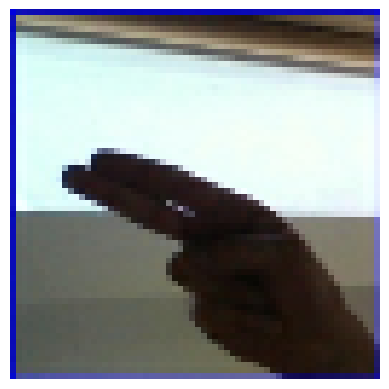

In [4]:
import matplotlib.pyplot as plt

plt.imshow(next(iter(train_dataset))[0][0].numpy().astype("uint8"))
plt.axis("off")
plt.show()

In [5]:
num_classes = len(train_dataset.class_names)

print(f'number of classes: {num_classes}')
print(f'class names: {train_dataset.class_names}')

number of classes: 29
class names: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


In [6]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model

In [7]:
def plot_loss_acc(history, model_name='model_1'):
    plt.title(f"Loss - {model_name}")
    plt.plot(history.history['loss'], c='red', label='train_loss')
    plt.plot(history.history['val_loss'], c='green', label='val_loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.title(f"Accuracy - {model_name}")
    plt.plot(history.history['accuracy'], c='red', label='train_accuracy')
    plt.plot(history.history['val_accuracy'], c='green', label='val_accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


# Sequential

In [ ]:
# Build Arch - Sequential API

model = Sequential([
    Input(shape=(64, 64, 3), name='input_layer'),
    Rescaling(1./255),
    Flatten(),

    Dense(1000, activation='relu', name='hidden_layer1'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1000, activation='relu', name='hidden_layer2'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(700, activation='relu', name='hidden_layer3'),
    BatchNormalization(),
    Dropout(0.1),
    
    Dense(29, activation='softmax', name='output_layer')
])

model_name = 'ASL_Alphabet_Classifier_Sequential'
model.summary()

In [ ]:
# Compile Model

from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Callback

from tensorflow.keras.callbacks import TensorBoard
from datetime import datetime
import os

os.makedirs('logs', exist_ok=True)
log_dir = 'logs/' + f'{model_name}_' + datetime.now().strftime("%Y-%m-%d")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=0)

In [ ]:
# Fit

history = model.fit(train_dataset, validation_data=val_dataset, epochs=20, callbacks=[tensorboard_callback])

In [ ]:
plot_loss_acc(history, model_name='ASL_Alphabet_Classifier')

# Functional 

In [8]:
# Build Arch - Functional API

model_name = 'ASL_Alphabet_Classifier_functionalAPI_Adam'

input_ = Input(shape=(64, 64, 3))
input_ = Rescaling(1./255)(input_)
hidden = Flatten()(input_)

hidden = Dense(800, activation='relu', kernel_initializer='he_normal')(hidden)
hidden = BatchNormalization()(hidden)
hidden = Dropout(0.1)(hidden)

hidden = Dense(800, activation='relu', kernel_initializer='he_normal')(hidden)
hidden = BatchNormalization()(hidden)
hidden = Dropout(0.1)(hidden)

hidden = Dense(600, activation='relu', kernel_initializer='he_normal')(hidden)
hidden = BatchNormalization()(hidden)
hidden = Dropout(0.1)(hidden)

output = Dense(29, activation='softmax')(hidden)


model_functional = Model(inputs=[input_], outputs=[output])
model_functional.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ keras_tensor_1CLONE             │ (None, 64, 64, 3)      │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 800)            │     9,831,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 800)            │         3,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 800)            │       640,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 800)            │         3,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 600)            │       480,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 600)            │         2,400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 600)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 29)             │        17,429 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,978,829 (41.88 MB)

 Trainable params: 10,974,429 (41.86 MB)

 Non-trainable params: 4,400 (17.19 KB)

In [9]:
# Compile Model

from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)

model_functional.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Callback
from tensorflow.keras.callbacks import TensorBoard
from datetime import datetime
import os

os.makedirs('logs', exist_ok=True)
log_dir = 'logs/' + f'{model_name}_' + datetime.now().strftime("%Y-%m-%d")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=0)


In [11]:
# Fit

history = model_functional.fit(train_dataset, validation_data=val_dataset, epochs=25, callbacks=[tensorboard_callback])

Epoch 1/25
2789/2789 ━━━━━━━━━━━━━━━━━━━━ 132s 47ms/step - accuracy: 0.5450 - loss: 1.4667 - val_accuracy: 0.2510 - val_loss: 5.3850
Epoch 2/25
2789/2789 ━━━━━━━━━━━━━━━━━━━━ 168s 60ms/step - accuracy: 0.7691 - loss: 0.7053 - val_accuracy: 0.6906 - val_loss: 1.4452
Epoch 3/25
2789/2789 ━━━━━━━━━━━━━━━━━━━━ 176s 63ms/step - accuracy: 0.8251 - loss: 0.5326 - val_accuracy: 0.8006 - val_loss: 1.1206
Epoch 4/25
2789/2789 ━━━━━━━━━━━━━━━━━━━━ 179s 64ms/step - accuracy: 0.8587 - loss: 0.4255 - val_accuracy: 0.8011 - val_loss: 1.0332
Epoch 5/25
2789/2789 ━━━━━━━━━━━━━━━━━━━━ 157s 56ms/step - accuracy: 0.8788 - loss: 0.3650 - val_accuracy: 0.8522 - val_loss: 0.7085
Epoch 6/25
2789/2789 ━━━━━━━━━━━━━━━━━━━━ 151s 54ms/step - accuracy: 0.8934 - loss: 0.3189 - val_accuracy: 0.8631 - val_loss: 0.6264
Epoch 7/25
2789/2789 ━━━━━━━━━━━━━━━━━━━━ 148s 53ms/step - accuracy: 0.9036 - loss: 0.2907 - val_accuracy: 0.8917 - val_loss: 0.6404
Epoch 8/25
2789/2789 ━━━━━━━━━━━━━━━━━━━━ 161s 58ms/step - accuracy: 

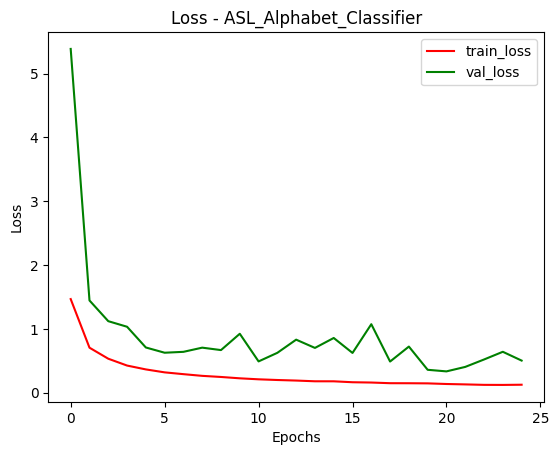

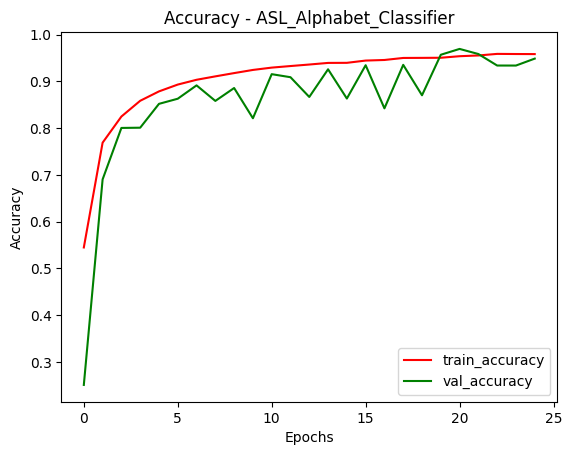

In [12]:
plot_loss_acc(history, model_name='ASL_Alphabet_Classifier')

# Prediction

In [13]:
# test performance
model_functional.evaluate(val_dataset)

698/698 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9489 - loss: 0.5034


[0.5034247040748596, 0.9489173889160156]

In [14]:
import os
import tensorflow as tf

folder = "ASL_Alphabet_Dataset/asl_alphabet_test"

# Get sorted list of image filenames
image_filenames = sorted([fname for fname in os.listdir(folder) if fname.endswith(('.png', '.jpg', '.jpeg'))])

test_images = []
test_labels = []

for filename in image_filenames:
    img_path = os.path.join(folder, filename)
    img = tf.keras.utils.load_img(img_path, target_size=(64, 64))
    img_array = tf.keras.utils.img_to_array(img)
    test_images.append(img_array)
    label = os.path.splitext(filename)[0]
    test_labels.append(label)

test_images = tf.convert_to_tensor(test_images, dtype=tf.float32)

print("Images shape:", test_images.shape)
print("Labels:", test_labels)

Images shape: (28, 64, 64, 3)
Labels: ['A_test', 'B_test', 'C_test', 'D_test', 'E_test', 'F_test', 'G_test', 'H_test', 'I_test', 'J_test', 'K_test', 'L_test', 'M_test', 'N_test', 'O_test', 'P_test', 'Q_test', 'R_test', 'S_test', 'T_test', 'U_test', 'V_test', 'W_test', 'X_test', 'Y_test', 'Z_test', 'nothing_test', 'space_test']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


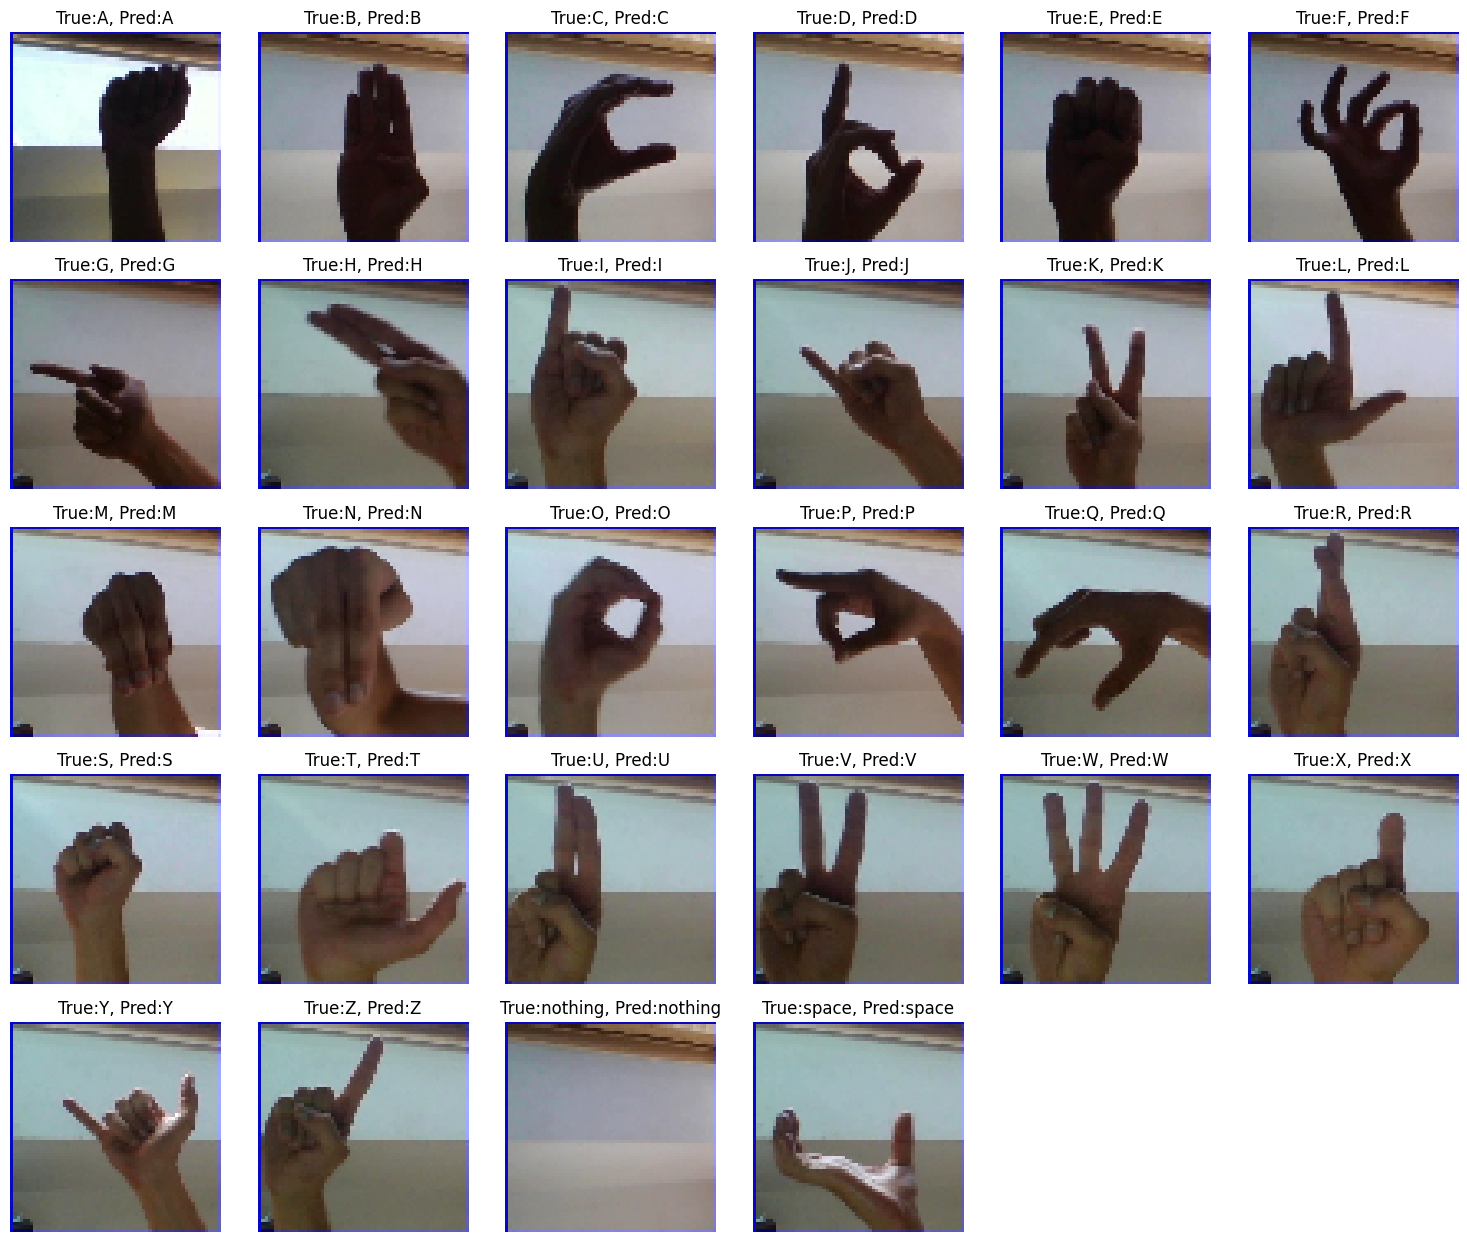

In [15]:
pred_propas = model_functional.predict(test_images)
pred_labels = pred_propas.argmax(axis=-1)

plt.figure(figsize=(15, 15))

for i in range(len(test_images)):
    plt.subplot(6, 6, i + 1)
    plt.imshow(test_images[i]/255.0)
    plt.axis("off")

    true_label = test_labels[i][:-5]
    plt.title(f"True:{true_label}, Pred:{train_dataset.class_names[pred_labels[i]]}")

plt.tight_layout()
plt.show()